# Tải bộ dữ liệu

Cài đặt Kaggle

In [ ]:
!pip install -q kaggle

Tải file Kaggle.json từ máy (chứa thông tin tải khoản đăng kí trong kaggle)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tuandat266","key":"5fa9ee464727f1889dff9402391c1ff8"}'}

Tạo một thư mục kaggle

In [ ]:
! mkdir ~/.kaggle

Sao chép file kaggle.json vào thư mục đã tạo

In [ ]:
! cp kaggle.json ~/.kaggle/

Cho phép file json hoạt động

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Sử dụng API để tải xuống tập dữ liệu (được lưu trữ tại Tệp)

In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

100% 185M/185M [00:10<00:00, 23.7MB/s]
100% 185M/185M [00:10<00:00, 18.3MB/s]


Giải nén các file để dùng

In [ ]:
!unzip az-handwritten-alphabets-in-csv-format.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


# Tìm hiểu bộ dữ liệu

Thiết lập cơ bản

In [ ]:
import pandas as pd
import numpy as np

#Làm cho các giá trị numpy dễ đọc hơn
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Thư viện trợ giúp
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Đọc file dữ liệu .csv 

In [ ]:
train_dataset = pd.read_csv("A_Z Handwritten Data.csv")
num_train_dataset = train_dataset.shape[0]

In một vài thông tin

In [ ]:
print(f"Number of training data: {num_train_dataset}")
train_dataset.head()

Number of training data: 372450


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_dataset.shape

(372450, 785)

### Khám phá dữ liệu đã xử lí

Vẽ một ảnh để xem sao

Trích xuất nhãn

In [ ]:
train_dataset.rename(columns={'0':'label'}, inplace=True)

In [ ]:
train_y = train_dataset['label'].astype('float32')
train_x = train_dataset.drop(['label'],axis = 1).astype('int32')
train_x.shape, train_y.shape

((372450, 784), (372450,))

Mã hóa các nhãn

In [ ]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

Vẽ ảnh đầu tiên của tập dữ liệu huấn luyện

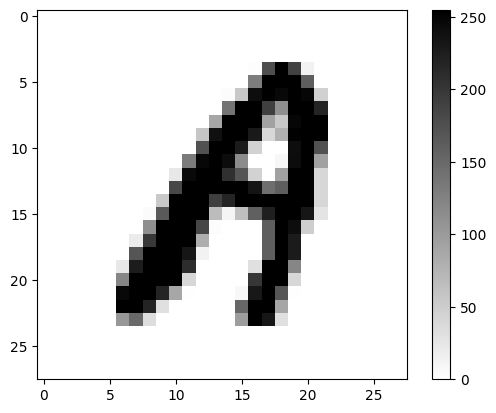

In [ ]:
# Lấy 1 ảnh và định dạng lại
image = train_x.loc[0]
image = image.to_numpy().reshape(28, 28) 

# In ảnh mẫu
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Hiển thị 25 hình ảnh đầu tiên từ tập huấn luyện và hiển thị tên nhãn bên dưới mỗi hình ảnh. Xác minh rằng dữ liệu ở định dạng chính xác và chúng tôi đã sẵn sàng để xây dựng và huấn luyện mạng.

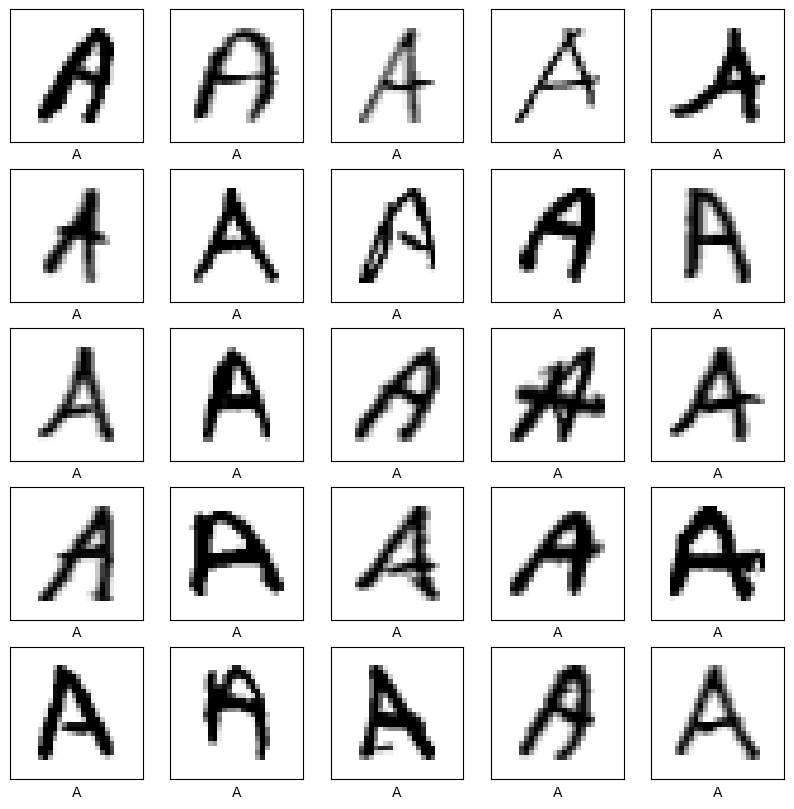

In [ ]:
# Hiển thị nhiều hơn
plt.figure(figsize=(10,10))
for i in range(25):
    image = train_x.loc[i].to_numpy().reshape(28, 28) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(encode[int(train_y[i])])
plt.show()

# Gọi các thư viện cần thiết

Các thư viện cần thiết:
*   os — đọc file và cấu trúc thư mục
*   numpy — sử dụng một số phép toán
*   matplotlib.pyplot — vẽ biểu đồ và hiển thị hình ảnh

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Tham số mô hình

In [ ]:
TEST_SIZE = 0.2 #20% của tập huấn luyện được sử dụng cho thẩm định

BATCH_SIZE = 50
IMG_SHAPE  = 28 # Bộ dữ liệu gồm các ảnh 28*28
EPOCHS     = 10

# Chuẩn bị dữ liệu

In [ ]:
print(type(train_x))

<class 'pandas.core.frame.DataFrame'>


Chia tập dữ liệu thành tập huấn luyện, tập hợp lệ và tập kiểm tra mới

In [ ]:
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,test_size=TEST_SIZE)
val_x,test_x,val_y,test_y = train_test_split(val_x,val_y,test_size=TEST_SIZE)

In [ ]:
train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x / 255.0

val_x = val_x.values.reshape(-1,28,28,1)
val_x = val_x / 255.0

test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x / 255.0

train_x.shape, val_x.shape, test_x.shape

((297960, 28, 28, 1), (59592, 28, 28, 1), (14898, 28, 28, 1))

One-hot encoding

In [ ]:
#chuyển dữ liệu thành dạng véc-tơ
train_y = tf.keras.utils.to_categorical(train_y,26)
val_y = tf.keras.utils.to_categorical(val_y,26)
test_y = tf.keras.utils.to_categorical(test_y,26)

train_y.shape, val_y.shape, test_y.shape

((297960, 26), (59592, 26), (14898, 26))

In [ ]:
#In ra sau khi one-hot codeing
print(train_y[0:5,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


# Xây dựng mô hình

## Định nghĩa tham số mô hình

In [ ]:
#Nhập các thông số
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(26, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

Một biến dừng sớm

In [ ]:
EPOCHS_COUNT = 0

In [ ]:
#Xác định chức năng gọi lại để dừng quá trình đào tạo của chúng tôi sau khi đạt được độ chính xác có thể chấp nhận được
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            global EPOCHS_COUNT
            EPOCHS_COUNT = epoch
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

## Biên dịch mô hình

Chúng tôi sẽ sử dụng trình tối ưu hóa `adam`. Vì chúng tôi đưa ra phân loại softmax, nên chúng tôi sẽ sử dụng `sparse_categorical_crossentropy` làm hàm mất mát. Chúng tôi cũng muốn xem xét độ chính xác của quá trình đào tạo và xác thực trên mỗi kỷ nguyên khi chúng tôi đào tạo mạng của mình, vì vậy chúng tôi sẽ chuyển đối số chỉ số.

In [ ]:
#Biên dịch và huấn luyện với batch size = 50, epochs = 10, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tf.shape(train_y)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([297960,     26], dtype=int32)>

## Huấn luyện mô hình

In [ ]:
history = model.fit(train_x, train_y, 
                    batch_size = 50, 
                    epochs = EPOCHS, 
                    validation_data = (val_x, val_y),
                    callbacks=[callbacks])

Epoch 1/10
5960/5960 [==============================] - 61s 8ms/step - loss: 0.2082 - accuracy: 0.9412 - val_loss: 0.0507 - val_accuracy: 0.9864
Epoch 2/10
5960/5960 [==============================] - 46s 8ms/step - loss: 0.0695 - accuracy: 0.9817 - val_loss: 0.0417 - val_accuracy: 0.9879
Epoch 3/10
5960/5960 [==============================] - 45s 8ms/step - loss: 0.0534 - accuracy: 0.9859 - val_loss: 0.0391 - val_accuracy: 0.9894
Epoch 4/10
5960/5960 [==============================] - 46s 8ms/step - loss: 0.0462 - accuracy: 0.9877 - val_loss: 0.0377 - val_accuracy: 0.9897
Epoch 5/10
5960/5960 [==============================] - 43s 7ms/step - loss: 0.0406 - accuracy: 0.9891 - val_loss: 0.0312 - val_accuracy: 0.9918
Epoch 6/10
5960/5960 [==============================] - 43s 7ms/step - loss: 0.0360 - accuracy: 0.9901 - val_loss: 0.0352 - val_accuracy: 0.9910
Epoch 7/10
5960/5960 [==============================] - 42s 7ms/step - loss: 0.0345 - accuracy: 0.9907 - val_loss: 0.0271 - val_ac

Trực quan hóa kết quả huấn luyện

In [ ]:
EPOCHS_COUNT

9

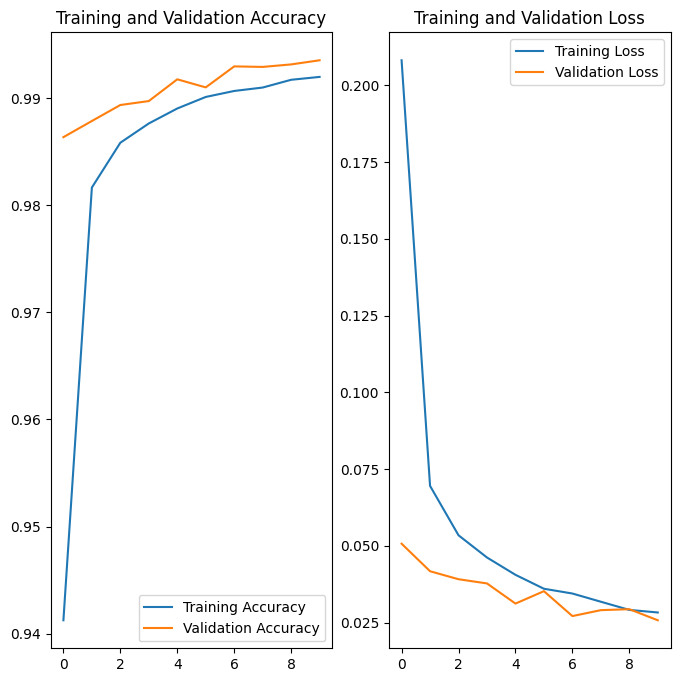

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS_COUNT+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Lưu và tải toàn bộ mô hình


## Định dạng mô hình đã lưu

Các mô hình được lưu ở định dạng này có thể được khôi phục bằng cách sử dụng tf.keras.models.load_model và tương thích với Dịch vụ TensorFlow. Hướng dẫn SavingModel đi vào chi tiết về cách cung cấp/kiểm tra SavingModel.

In [ ]:
# Lưu toàn bộ mô hình dưới dạng SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

## Tải mô hình

Định dạng SavingModel là một thư mục chứa tệp nhị phân protobuf và điểm kiểm tra TensorFlow. Kiểm tra thư mục mô hình đã lưu:

In [ ]:
# thư mục my_model 
!ls saved_model

# Chứa thư mục nội dung, tệp lưu_model.pb và thư mục biến.
!ls saved_model/my_model

my_model
assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


Tải lại mô hình Keras mới từ mô hình đã lưu:

In [ ]:
model = tf.keras.models.load_model('saved_model/my_model')

# Kiểm tra lại
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

## Tải mô hình xuống

Bạn có thể tải SavingModel xuống đĩa cục bộ của mình bằng cách tạo một tệp zip. Chúng tôi sẽ sử dụng tùy chọn `-r` (recursice) để nén tất cả các thư mục con.

In [ ]:
!zip -r model.zip {'saved_model/my_model'}

  adding: saved_model/my_model/ (stored 0%)
  adding: saved_model/my_model/assets/ (stored 0%)
  adding: saved_model/my_model/saved_model.pb (deflated 89%)
  adding: saved_model/my_model/variables/ (stored 0%)
  adding: saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/my_model/variables/variables.index (deflated 68%)
  adding: saved_model/my_model/keras_metadata.pb (deflated 93%)
  adding: saved_model/my_model/fingerprint.pb (stored 0%)


Tệp zip được lưu trong thư mục làm việc hiện tại. Bạn có thể xem thư mục làm việc hiện tại là gì bằng cách chạy:

In [ ]:
!ls

 az-handwritten-alphabets-in-csv-format.zip   kaggle.json   saved_model
'A_Z Handwritten Data'			      model.zip
'A_Z Handwritten Data.csv'		      sample_data


Sau khi tệp được nén, bạn có thể tải tệp xuống đĩa cục bộ của mình.

In [ ]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lệnh `files.download` sẽ tìm kiếm các tệp trong thư mục làm việc hiện tại của bạn. Nếu tệp bạn muốn tải xuống nằm trong một thư mục khác với thư mục làm việc hiện tại, bạn phải bao gồm đường dẫn đến thư mục chứa tệp.

Hãy xem hiệu suất của mô hình của chúng tôi trên bộ thử nghiệm

# Dự đoán

## Tạo dự đoán

Dự đoán cho tập kiểm tra

In [ ]:
results = model.predict(test_x)
predicted_test_labels = np.argmax(results,axis = 1)
print(predicted_test_labels)

466/466 [==============================] - 2s 3ms/step
[18  2 13 ...  2 19 19]


## Dự đoán cho bộ thử nghiêm mới

Dự đoán ảnh đầu tiên

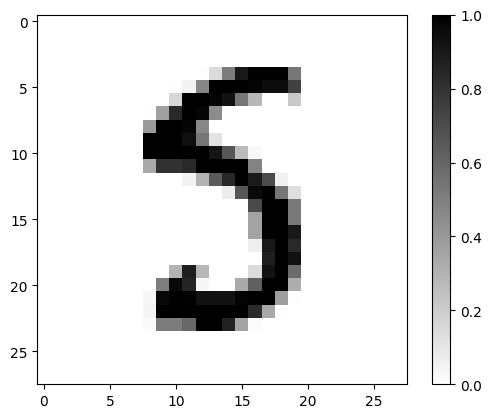

In [ ]:
# Lấy 1 ảnh và chỉnh sửa lại
image = test_x[0]
image = image.reshape(28, 28) 

# In ảnh
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(encode[predicted_test_labels[0]])

S


So sánh với nhãn đúng

In [ ]:
test_labels = np.argmax(test_y,axis = 1)

In [ ]:
print(encode[test_labels[0]])

S


Dự đoán với 25 ảnh đầu tiên của bộ kiểm tra

Bộ dữ liệu kiểm tra với nhãn đúng

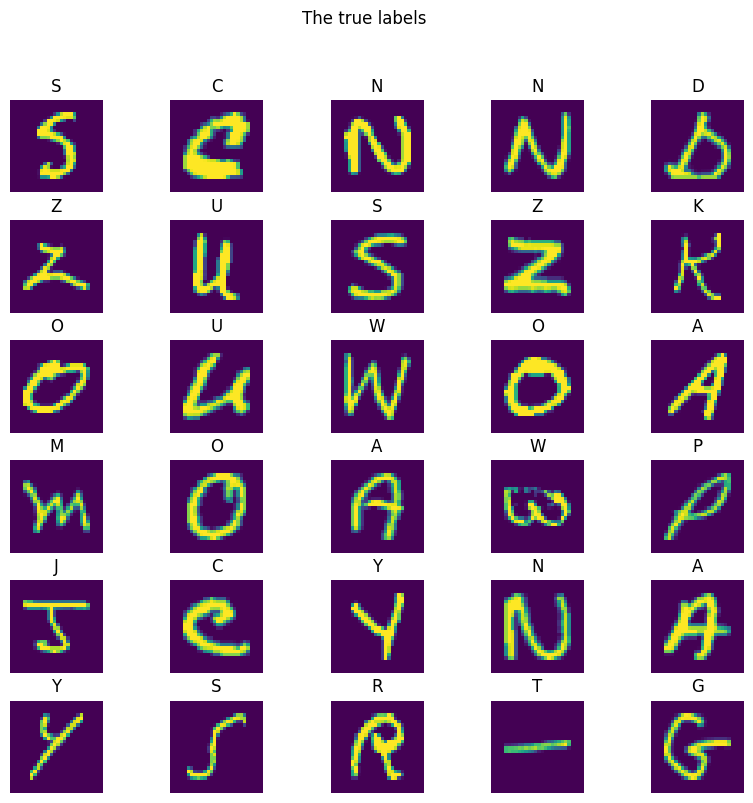

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)

  image = test_x[n].reshape(28, 28) 
  plt.imshow(image)
  plt.title(encode[test_labels[n]])
  plt.axis('off')
_ = plt.suptitle("The true labels")

Đây là dự đoán của mô hình được đào tạo của chúng tôi. Nhãn dự đoán đúng có màu xanh lam và nhãn dự đoán sai có màu đỏ

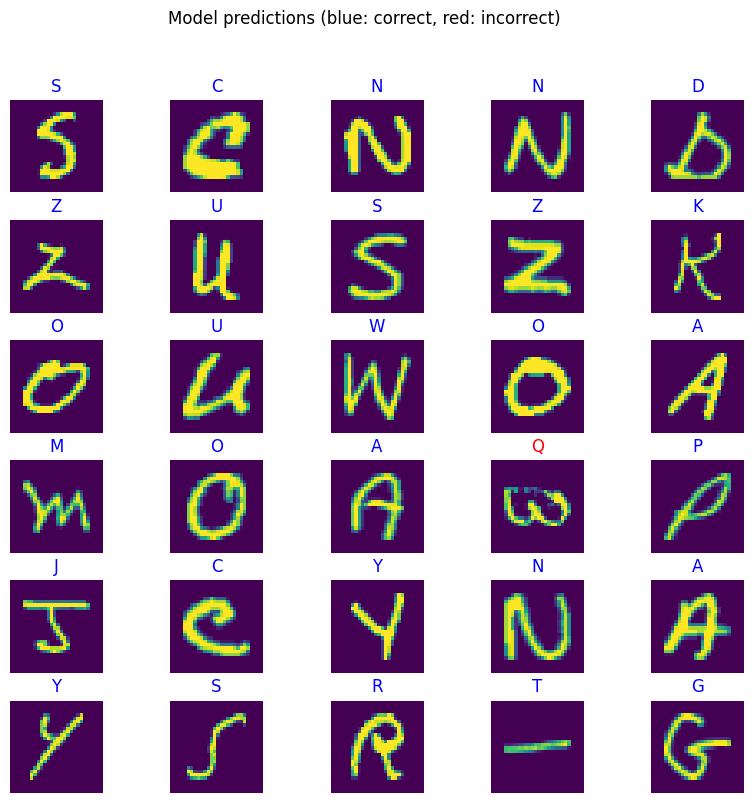

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)

  image = test_x[n].reshape(28, 28) 
  plt.imshow(image)
  color = "blue" if predicted_test_labels[n] == test_labels[n] else "red"
  plt.title(encode[predicted_test_labels[n]], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

# Đánh giá

Xem hiệu suất của mô hình của chúng tôi trên bộ thử nghiệm

In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("Model accuracy: {:5.2f}%".format(100*acc))

466/466 [==============================] - 2s 3ms/step - loss: 0.0294 - accuracy: 0.9930
Model accuracy: 99.30%


Ma trận hỗn loạn:

466/466 [==============================] - 1s 2ms/step


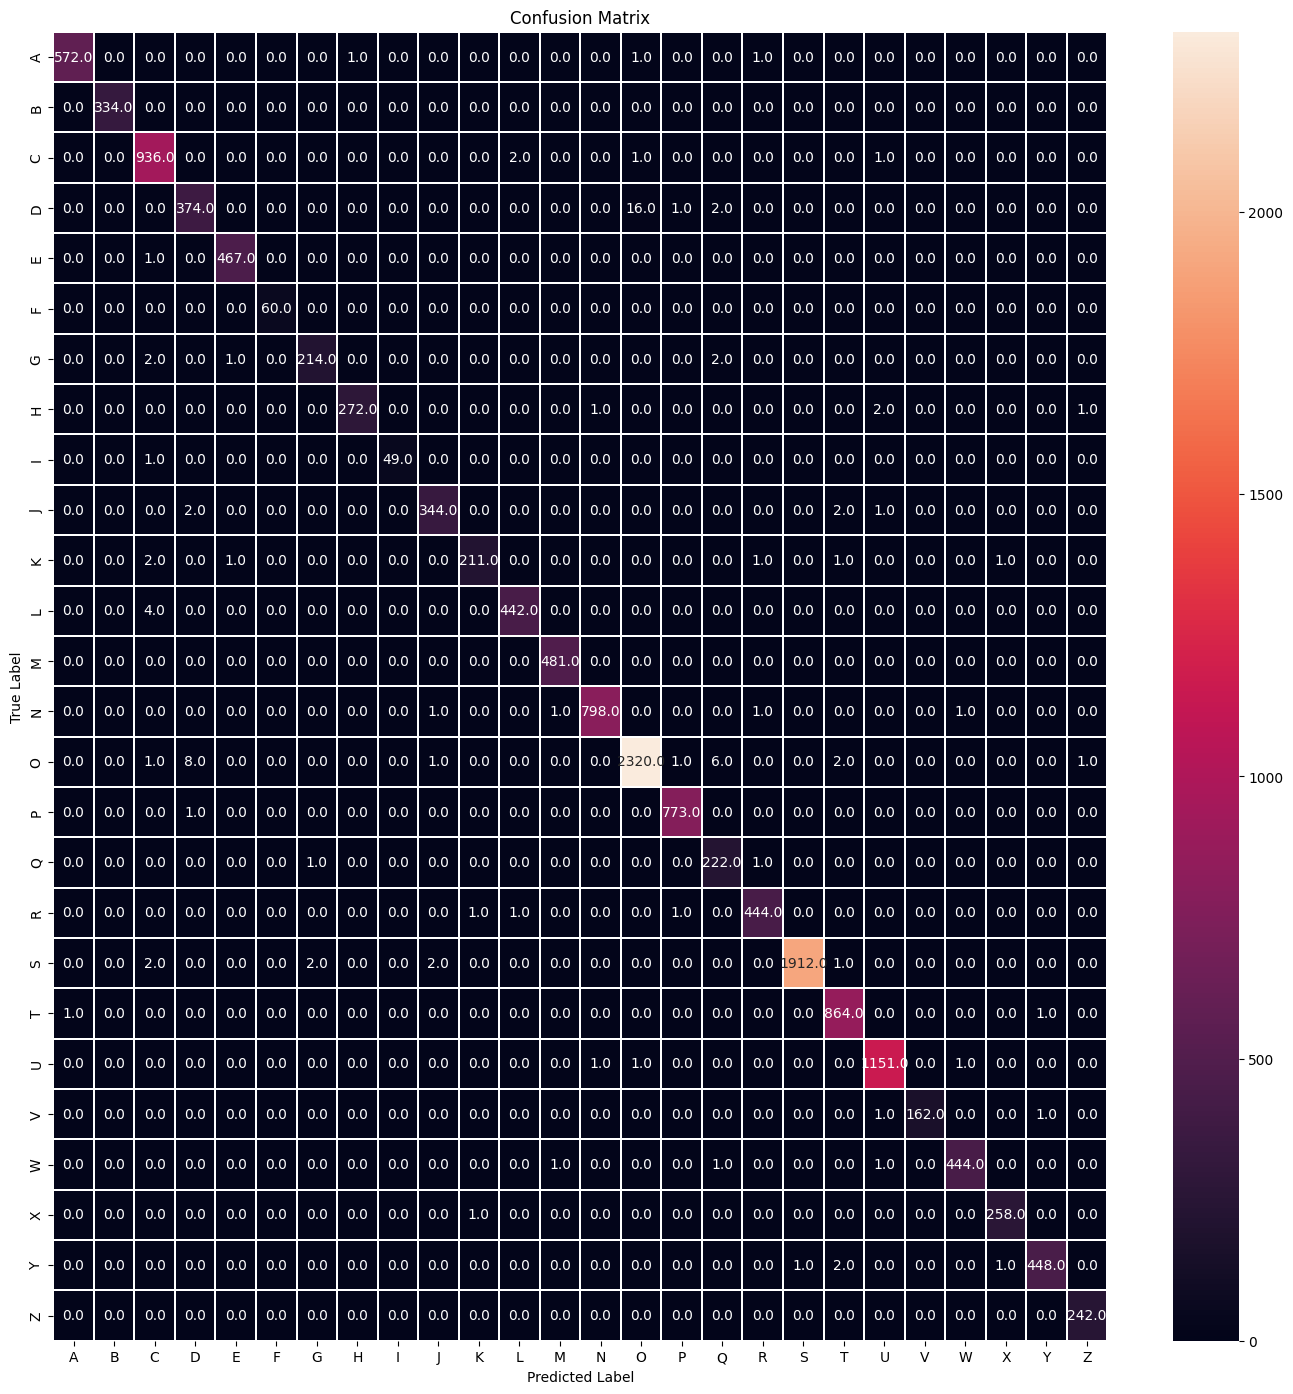

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_answer = np.argmax(test_y, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_answer, y_pred_classes)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, fmt='.1f', ax=ax, xticklabels=list(encode.values()), yticklabels=list(encode.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Tự thử nghiệm mô hình

In [2]:
from google.colab import files
files.upload()

## Tải lại mô hình lên

## Giải nén

Giải nén mô hình

In [3]:
! unzip modelaz.zip

Archive:  modelaz.zip
   creating: saved_model/my_model/
  inflating: saved_model/my_model/keras_metadata.pb  
 extracting: saved_model/my_model/fingerprint.pb  
  inflating: saved_model/my_model/saved_model.pb  
   creating: saved_model/my_model/assets/
   creating: saved_model/my_model/variables/
  inflating: saved_model/my_model/variables/variables.index  
  inflating: saved_model/my_model/variables/variables.data-00000-of-00001  


## Lưu lại mô hình

Định dạng SavingModel là một thư mục chứa tệp nhị phân protobuf và điểm kiểm tra TensorFlow. Kiểm tra thư mục mô hình đã lưu:

In [4]:
# Lưu lại
!ls saved_model

!ls saved_model/my_model

my_model
assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


Reload a fresh Keras model from the saved model:

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('saved_model/my_model')

# kiểm tra lại mô hình
model.summary()

Model: "sequential"


## Tải ảnh lên

Tải ảnh lên và kiểm tra. Nên dùng ảnh nền đen và hình vẽ màu trắng

Ví dụ:

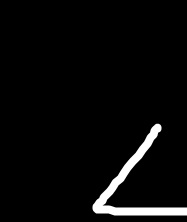

In [1]:
uploaded = files.upload()
filename = next(iter(uploaded))

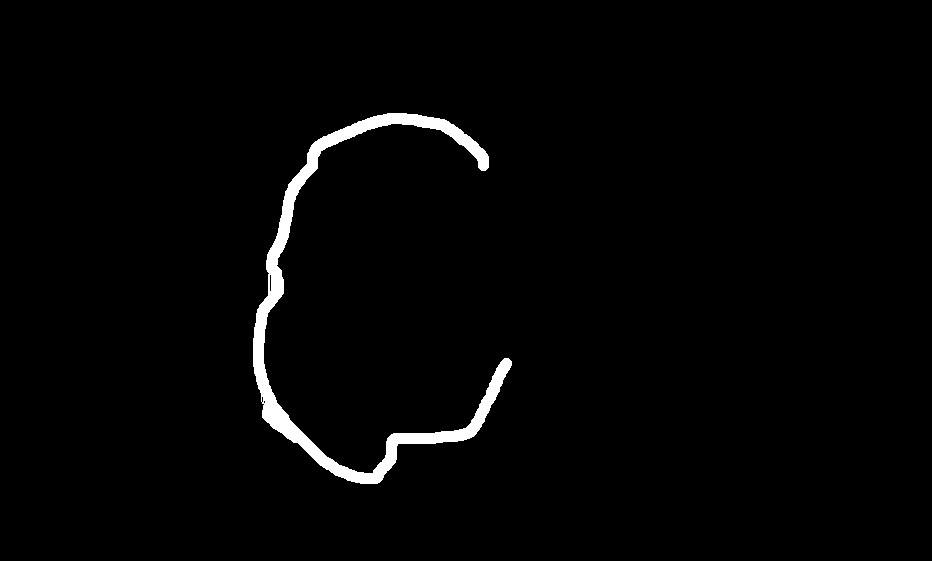

In [ ]:
from IPython.display import Image
Image(filename) #show image with its original size

In [ ]:
import imageio
im = imageio.imread(filename)
print(im.shape)

(561, 932, 4)


<ipython-input-51-09dc5a752e17>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(filename)


## Xử lí

Chỉnh sửa để dự đoán:

In [ ]:
# Chỉnh sửa ảnh đưa vào
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
# load the image
img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0
# convert to array
type(img)
tf.shape(img)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([28, 28,  1], dtype=int32)>

Các mô hình tf.keras được tối ưu hóa để đưa ra dự đoán trên lô hoặc bộ sưu tập các ví dụ cùng một lúc. Vì vậy, mặc dù chúng tôi đang sử dụng một hình ảnh duy nhất, chúng tôi cần thêm nó vào danh sách:

In [ ]:
import numpy as np

x = np.array([img])

## Kết quả

Ảnh sau khi định dạng lại

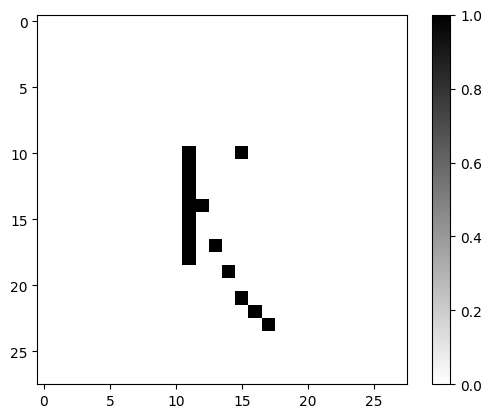

In [ ]:
import matplotlib.pyplot as plt
# Lấy ảnh sau khi chỉnh sửa
image = x
image = image.reshape(28, 28) 

# Vẽ ảnh
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Dự đoán của mô hình

In [ ]:
predict = model.predict(x)
predict

1/1 [==============================] - 0s 23ms/step


array([[0.01019705, 0.02275958, 0.12354226, 0.00596408, 0.14403878,
        0.02297772, 0.01549964, 0.00894454, 0.00114971, 0.01252595,
        0.1335825 , 0.06345758, 0.01024133, 0.02325506, 0.01507927,
        0.03864432, 0.01270295, 0.11720857, 0.03910872, 0.02336936,
        0.04898702, 0.00657062, 0.01907939, 0.01899671, 0.03685546,
        0.02526179]], dtype=float32)

In [ ]:
# Dictionary for encoding label
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

**`model.predict` kết quả trùng khớp nhất

In [ ]:
predict = model.predict(x)
label = np.argmax(predict,axis = 1)
encode[label[0]]

1/1 [==============================] - 0s 31ms/step


'E'

Trực quan hóa dự đoán

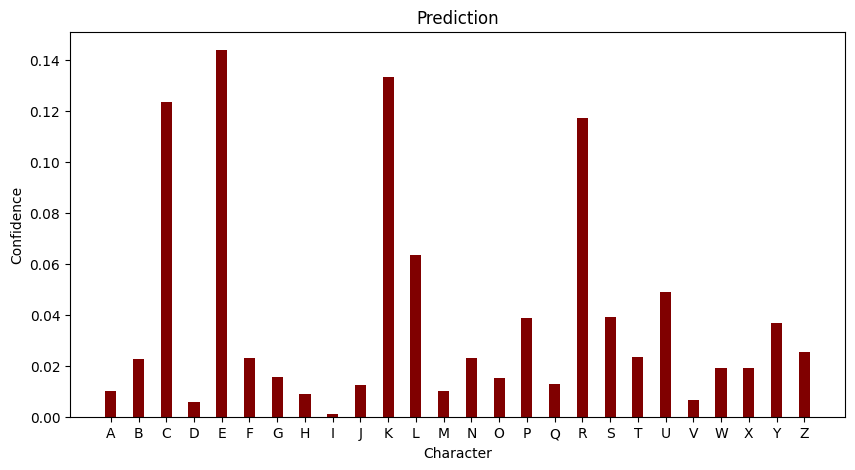

In [ ]:
# trực quan hóa kết quả
x = list(encode.values())
y = list(predict.flatten())
  
fig = plt.figure(figsize = (10, 5))
 
# tạo biểu đồ cột
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Character")
plt.ylabel("Confidence")
plt.title("Prediction")
plt.show()